In [1]:
# pip installing required libraries
# !pip install requests pandas datetime matplotlib seaborn os time numpy

In [24]:
# import libraries

import requests # to make the HTTP request to NYT API
import pandas as pd # for data manipulation (store, clean, analyze response data)
import numpy as np # for numerical computations
from datetime import datetime, timedelta # to work with dates (extract pub dates, format pub dates, handle date ranges)
import matplotlib.pyplot as plt # for visualization plots
import matplotlib.dates as mdates # to format x-axis of plots visualized  
import seaborn as sns # for visualization plots
from config import API_KEY as api_key # to import api_key
import os # for file handling (checking if csv file exists) 
from io import StringIO # to handle json response 


In [26]:
# defining funciton to return dictionary of NYT sections

def NYT_sections():

     # setting dictionary of all NYT sections for user choice
  NYT_sections = {"1": "Arts", "2": "Automobiles", "3":"Autos", "4": "Blogs", "5": "Books", "6": "Booming", "7": "Business", "8": "Business Day", "9": "Corrections", "10": "Crosswords & Games",
      "11": "Crosswords/Games", "12": "Dining & Wine", "13": "Dining and Wine", "14": "Editors' Notes", "15": "Education", "16": "Fashion & Style", "17": "Food", "18": "Front Page", "19": "Giving",
      "20": "Global Home", "21": "Great Homes & Destinations", "22": "Great Homes and Destinations", "23": "Health", "24": "Home & Garden", "25": "Home and Garden", "26": "International Home", "27": "Job Market", "28": "Learning", "29": "Magazine",
      "30": "Movies", "31": "Multimedia", "32": "Multimedia/Photos", "33": "N.Y. / Region", "34": "N.Y./Region", "35": "NYRegion", "36": "NYT Now", "37": "National", "38": "New York", "39": "New York and Region",
      "40": "Obituaries", "41": "Olympics", "42": "Open", "43": "Opinion", "44": "Paid Death Notices", "45": "Public Editor", "46": "Real Estate", "47": "Science", "48": "Sports", "49": "Style",
      "50": "Sunday Magazine", "51": "Sunday Review", "52": "T Magazine", "53": "T:Style", "54": "Technology", "55": "The Public Editor", "56": "The Upshot", "57": "Theater", "58": "Times Topics", "59": "TimesMachine",
      "60": "Today's Headlines", "61": "Topics", "62": "Travel", "63": "U.S.", "64": "Universal", "65": "UrbanEye", "66": "Washington", "67": "Week in Review", "68": "World", "69": "Your Money"}

  # returning dictionary
  return NYT_sections

In [28]:
# defining function that takes an argument (sections)
# displays all NYT sections
# takes user input for NYT section selection

def user_section_choice(sections):

  # using while loop that will loop until user input is valid
  while True:

    print("The NYT article sections are: ")

    # iterating through the keys and values of the NYT sections dictionary items
    for key, value in sections.items():

      # printing the NYT sections
      print(f'{key}: {value}')

    # taking user input for section choice as string, perfect datatype to access key and value in dictionary
    section_choice = input("Please enter a section choice, using the sections' key: ")

    # if user input is valid entry, try
    try:

      # checking if user input is in NYT section dictionary key
      if section_choice in sections:

        # returning the value associated with the selected key
        return sections[section_choice]

      else:

        print("Invalid section key. Please enter a valid key from the sections dictionary above. ")

    # exception handling of exceptions in case user input is not a valid entry
    except Exception as e:
      print(f"Invalid entry: {e}. Please enter a valid key from the sections dictionary above.")

In [30]:
# defining function to take date range for fetching articles

def date_range_choice():

  # using while loop that will loop until date ranges are valid
  while True:

    # taking user input for start date and end dates
    # using strip to remove trailing/leading spaces from string date inputs
    start_date_input = input("Enter start date (MM-DD-YYYY): ").strip()
    end_date_input = input("Enter end date (MM-DD-YYYY): ").strip()

    try:

      # parsing user input strings to date time objects then converting to date objects 
      start_date_obj = datetime.strptime(start_date_input, "%m-%d-%Y").date()
      end_date_obj = datetime.strptime(end_date_input, "%m-%d-%Y").date()

      # setting variable to today's date (today meaning the day script is run)
      todays_date = datetime.now().date()

      # checking if start date is before or equal to todays date
      if start_date_obj <= todays_date:

          # checking if start date is before end date
          if start_date_obj < end_date_obj:

              # checking if end date is after todays date 
              if end_date_obj > todays_date:
                  print("Invalid date range. Ensure end date is before todays date.")
                  
              else:
    
                # reformatting the date objects from MM-DD-YYYY to NYT string format YYYYMMDD
                start_date_str = start_date_obj.strftime("%Y%m%d")
                end_date_str = end_date_obj.strftime("%Y%m%d")

                # returning reformatted dates for url passing and unformatted dates to use with plots
                return start_date_str, end_date_str, start_date_input, end_date_input
                  
          else:
            print("Invalid date range. Ensure start date is before end date. ")
      else:
        print("Invalid date range. Ensure start date is before or equal to todays date. ")

    # exception handling ValueError if value is entered that cannot be converted to datetime
    except ValueError:
      print("Invalid entry. Please enter a date in the format MM-DD-YYYY. ")

In [32]:
# defining function to get articles, taking an argument url 

def get_nyt_articles(url):

    # empty list to store articles
    all_nyt_articles = []

    # setting page number 
    page = 0

    # while loop to run while pages are True, pages to be looped
    while True:

        # using f string to add pagination to url passed
        url_pag = f"{url}&page={page}"

        # try/except to handle errors
        try:

            # setting variable as fetched info from url
            nyt_response = requests.get(url_pag)

            # raising error for issues with HTTP
            nyt_response.raise_for_status()  

            # parsing json
            nyt_json = nyt_response.json()  

            # checking if keys in json
            if 'response' not in nyt_json or 'docs' not in nyt_json['response']:
                print("Unexpected response structure:", nyt_json)

                # breaking loop
                break 
                
            # setting variable as normaized dataframe, accessing article data
            nyt_articles = pd.json_normalize(nyt_json['response']['docs'])

            # checking if dataframe is empty
            if nyt_articles.empty:

                # breaking loop
                break  

            # appending the previously defined empty list 
            all_nyt_articles.append(nyt_articles)

            # looping through the pages 
            page += 1

        # handle exceptions raised by the requests module 
        except requests.exceptions.RequestException as re:
            print(f"Request error: {re}")

            # breaking loop
            break # replace w/ continue, add in if statement for re.response.status_code 429, time.sleep(12)
            
         # handle errors with invalid value and keys
        except (ValueError, KeyError) as vke:
            print(f"Error parsing JSON response: {vke}")
            print("Raw content from response:", nyt_response.text)

            # breaking loop
            break

    # returning a concatenated dataframe from the list, returning none if empty list
    return pd.concat(all_nyt_articles, ignore_index=True) if all_nyt_articles else None # boolean


In [34]:
# defining function to get article data, taking an argument - json dataframe

def get_article_data(json_df):
    
        # checking if json_df is not empty, meaning articles were found 
        if not json_df.empty:

            # setting variable to result of extracting headline, converting to list
            headline = json_df['headline.main'].tolist()

            # setting variable to result of extracting author, converting to list
            authors_json = json_df['byline.original'].tolist()

            # setting variable to result of list comprehension iterting through each author in author_json 
            # checking if author is missing, if so setting to 'No author available'
            # if author is not missing, slicing author string if it has a prefix to return just author name, returning author name as is if no prefix
            authors = ['No author available' if pd.isnull(author) else author[3:] if author.startswith("By ") else author for author in authors_json]

            # setting variable to result of extracting keywords, converting to list
            # applying function to column, using lambda to join each keyword string for each article into one string, delimited by a comma and space
            keywords = json_df['keywords'].apply(lambda x: ', '.join([keyword['value'] for keyword in x])).tolist()
            # list of dictionaries 
                
            # setting variable to result of extracting pub dates, converting to list and reformatting pub dates
            pub_date = pd.to_datetime(json_df['pub_date']).dt.strftime("%m-%d-%Y").tolist()

            
            # returning variables created above
            return headline, authors, keywords, pub_date
        else:
            print("No articles found for the selected section and date range.")
            return None

In [36]:
# defining function to save fetched data to csv, taking two arguments - the dataframe and a filename

def save_to_csv(df, filename):

    # using try/except to catch errors
    try:

        # loading existing data if the file exists
        if os.path.exists(filename):

            # setting variable to hold the read csv file
            existing_df = pd.read_csv(filename)

            # concatenating existing and new data, dropping duplicates
            df = pd.concat([existing_df, df], ignore_index=True).drop_duplicates()
        else:

            # create new file if no file exists
            df.to_csv(filename, index = False)

        # save the data to CSV
        df.to_csv(filename, index=False)

    # handling exceptions while saving the csv file
    except Exception as e:
        print(f"An error occurred while saving to CSV: {e}")

In [38]:
# defining function to read the csv file, taking an argument - filename

def read_csv(filename):

    # using try/except to catch errors
    try:

    # load existing data if the file exists
        if os.path.exists(filename):

            # setting variable to the read csv file
            df = pd.read_csv(filename)

            # returning the read csv file
            return df

    # handling exceptions while reading the csv file
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")


In [40]:
# creating function to take a dataframe as an argument to access specific column and periodicity, passing direct argument for head()
# clean values in column, calculate frequencies of values, and return top ten values with frequencies

def get_top_keywords(df, periodicity, num_keywords=10):

  # set new column with datetime type for proper parsing
  df['Publication Datetime'] = pd.to_datetime(df['Publication Date'])

  # series of if statements checking periodicity input
  if periodicity == "weekly":

        # creating new column to hold start date of week by extracting the start_time
        # converting datetime value in column to a period object
        df['Week'] = df['Publication Datetime'].dt.to_period('W').dt.start_time

  elif periodicity == "monthly":

        # creating new column to hold start date of month by extracting the start_time
        # converting datetime value in column to a period object
        df['Month'] = df['Publication Datetime'].dt.to_period('M').dt.start_time
      
  else:
      
    # creating new column to hold the extracted date
    df['Day'] = df['Publication Datetime'].dt.date

  # setting variable based on conditional expression  
  period_column = df['Day'] if periodicity == "daily" else df['Week'] if periodicity == "weekly" else df['Month']
  
  # setting variable to result of grouping keywords by period
  # applying function to each keyword group using lambda to join each as a string delimited by comma/space
  # removing leading spaces and splitting into ind keywords using comma/space
  # exploding list of keywords into a series 
  # calculating the frequency of each unique keyword in the series
  # selecting the top ten using head()
  keyword_counts = df.groupby(period_column)['Keywords'].apply(lambda x: ', '.join(x)).str.strip().str.split(', ').explode().value_counts().head(num_keywords).reset_index()

  # setting columns for series
  keyword_counts.columns = ['Keyword', 'Frequency']

  # return series of top ten keywords with frequencies
  return keyword_counts

In [42]:
# defining function to generate a bar plot of the top mentioned keywords in the section over the selected period, taking an argument - keyword_counts and periodicity
def plot_keyword_frequency(keyword_counts, periodicity):

    # Adjust figure size
    plt.figure(figsize=(12, 6))

    # generating barplot, setting x as the index and y as the values, setting hue to flutuate based on freq of keywords, setting palette
    sns.barplot(x='Keyword', y='Frequency', data = keyword_counts, hue = 'Keyword', palette="viridis")

    # set x label and font size based on periodicity
    if periodicity == "daily":
        plt.xlabel("Date", fontsize=12)
    elif periodicity == "weekly":
        plt.xlabel("Week", fontsize=12)
    elif periodicity == "monthly":
        plt.xlabel("Month", fontsize=12)

    # set y label and font size
    plt.ylabel("Frequency", fontsize=12)

    # set title, font size, and font weight
    plt.title("Top Ten Mentioned Keywords", fontsize=14, fontweight="bold")

    # adjusting tick lables
    plt.xticks(rotation=45, ha='right', fontsize=10)


    # setting the frequency values above each bar
    # lopping through the column, getting both index and value
    # plotting text on barplot (v), i is bar position, v + 0.5 to ensure value is placed above the top of the bar
    # converting the frequency value to string (v)
    for i, v, in enumerate(keyword_counts['Frequency']):
        plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)


    # showing plot
    plt.show()




In [44]:
# defining function to generate plots for top keywords to show trends over time, taking an argument - dataframe and periodicity, passing direct argument for head()

def analyze_keyword_trends(df, periodicity, num_keywords=10):

    # set new column with datetime type for proper parsing
    df['Publication Datetime'] = pd.to_datetime(df['Publication Date'])

    # series of if statements checking periodicity input
    if periodicity == "daily":

        # setting variable to result of transforming data for time series analysis
        # selecting the column and creating dummy variables of keywords separated by comma/space
        # grouping by pub date and calculate sum of frequencies
        keyword_trends = df['Keywords'].str.get_dummies(sep=', ').groupby(df['Publication Date']).sum()
        
    elif periodicity == "weekly":

        # creating new column to hold start date of week by extracting the start_time
        # converting datetime value in column to a period object
        df['Week'] = df['Publication Datetime'].dt.to_period('W').dt.start_time

        # setting variable to result of transforming data for time series analysis
        # selecting the column and creating dummy variables of keywords separated by comma/space
        # grouping by week and calculating sum of frequencies
        keyword_trends = df['Keywords'].str.get_dummies(sep=', ').groupby(df['Week']).sum()
        
    elif periodicity == "monthly":

        # creating new column to hold start date of month by extracting the start_time
        # converting datetime value in column to a period object
        df['Month'] = df['Publication Datetime'].dt.to_period('M').dt.start_time

        # setting variable to result of transforming data for time series analysis
        # selecting the column and creating dummy variables of keywords separated by comma/space
        # grouping by month and calculating sum of frequencies
        keyword_trends = df['Keywords'].str.get_dummies(sep=', ').groupby(df['Month']).sum()
        
    # setting variable to result of getting top keywords
    # summing frequency of occurances per column, sorting in descending order
    # selecting the first ten rows
    # accessing the index of the series, the keywords
    top_keywords = keyword_trends.sum().sort_values(ascending=False).head(num_keywords).index

    # setting subplot for trends of top keywords
    keyword_trends[top_keywords].plot(figsize=(15, 10), subplots=True, layout=( (num_keywords + 1) // 2 , 2), sharex=False)

    # setting titles for subplots
    plt.suptitle("Frequency of Top Keywords Over Time")

    # setting tight layout to adjust subplots to avoid overlapping
    plt.tight_layout()

    # showing plot
    plt.show()

In [46]:
# defining function to plot line graph illustrating the number of articles published per selected period in the section to spot trends, taking an argument - dataframe and periodicity
def plot_article_count_over_time(df, periodicity):

    # set new column with datetime type for proper parsing
    df['Publication Datetime'] = pd.to_datetime(df['Publication Date'])

            
    # customizing display format of date in plot
    date_format = '%m/%d/%y'

    # series of if statements checking periodicity input
    if periodicity == "daily":

        # setting variable to result of calculating frequency counts and sorting by ascending order
        article_counts = df['Publication Datetime'].value_counts().sort_index()
        
    elif periodicity == "weekly":

        # creating new column to hold start date of week by extracting the start_time
        # converting datetime value in column to a period object
        df['Week'] = df['Publication Datetime'].dt.to_period('W').dt.start_time

        # setting variable ot result of calculating frequency counts and sorting by ascending order
        article_counts = df['Week'].value_counts().sort_index()

        
    elif periodicity == "monthly":

        # creating new column to hold start date of month by extracting the start_time
        # converting datetime value in column to a period object
        df['Month'] = df['Publication Datetime'].dt.to_period('M').dt.start_time

        # setting variable ot result of calculating frequency counts and sorting by ascending order
        article_counts = df['Month'].value_counts().sort_index()


    # setting plot size
    article_counts.plot(figsize=(10, 6))

    # setting plot title
    plt.title('Number of Articles Published')

    # setting x lable
    plt.xlabel('Date')

    # setting y label
    plt.ylabel('Article Count')


    # setting lable ticks
    plt.xticks(rotation=45, ha='right')

    # get the current axes
    curr_axes = plt.gca()  

    # creating a DateFormatter object to format the dates 
    curr_axes.xaxis.set_major_formatter(mdates.DateFormatter(date_format))

    # setting the automatic placement of the date tick locations
    curr_axes.xaxis.set_major_locator(mdates.AutoDateLocator())  


    # showing plot
    plt.show()

In [48]:
# defining function to generate plots for top authors to show trends over time, taking an argument - dataframe and periodicity, passing direct argument for head()

def analyze_author_trends(df, periodicity, num_authors = 10):

    # set new column with datetime type for proper parsing
    df['Publication Datetime'] = pd.to_datetime(df['Publication Date'])
    
    # series of if statements checking periodicity input
    if periodicity == "daily":

        # setting variable to result of transforming data for time series analysis
        # selecting the column and creating dummy variables of author separated by comma/space
        # grouping by pub date and calculate sum of frequencies
        author_trends = df['Author'].str.get_dummies(sep=', ').groupby(df['Publication Date']).sum()
        

    elif periodicity == "weekly":

        # creating new column to hold start date of week by extracting the start_time
        # converting datetime value in column to a period object
        df['Week'] = df['Publication Datetime'].dt.to_period('W').dt.start_time

        # setting variable to result of transforming data for time series analysis
        # selecting the column and creating dummy variables of author separated by comma/space
        # grouping by week and calculating sum of frequencies
        author_trends = df['Author'].str.get_dummies(sep=', ').groupby(df['Week']).sum()
        
    elif periodicity == "monthly":

        # creating new column to hold start date of month by extracting the start_time
        # converting datetime value in column to a period object 
        df['Month'] = df['Publication Datetime'].dt.to_period('M').dt.start_time

        # setting variable to result of transforming data for time series analysis
        # selecting the column and creating dummy variables of author separated by comma/space
        # grouping by month and calculating sum of frequencies
        author_trends = df['Author'].str.get_dummies(sep=', ').groupby(df['Month']).sum()
        
    # setting variable to result of getting top authors
    # summing frequency of occurances per column, sorting in descending order
    # selecting the first ten rows
    # accessing the index of the series, the authors
    top_authors = author_trends.sum().sort_values(ascending=False).head(num_authors).index

    # setting subplot for trends of top authors
    author_trends[top_authors].plot(figsize=(15, 10), subplots=True, layout=( (num_authors + 1) // 2 , 2), sharex=False)

    # setting title for subplots
    plt.suptitle("Frequency of Top Authors Publications Over Time")


    # setting tight layout to adjust subplots to avoid overlapping
    plt.tight_layout()

    # showing plot
    plt.show()

In [50]:
# defining function to gather and return all user inputs

def get_user_inputs():

    # calling function that holds NYT dictionary of sections
    nyt_sections = NYT_sections()

    # setting variable to return of function, passing dictionary
    section = user_section_choice(nyt_sections)

    # unpacking returned variables from function
    begin_date, end_date, start_date_input, end_date_input = date_range_choice()

    # while loop that will run while user input is valid
    while True:

      # defining variable to take user input, converting input to all lowercase to avoid case sensistivity
      periodicity = input("Enter periodicity (daily, weekly, monthly: )").lower()

      # if statement to check if user input in designated inputs
      if periodicity in ["daily", "weekly", "monthly"]:
        # breaking loop
        break
      else:
        print("Invalid periodicity. Please enter daily, weekly, or monthly.")

    # returning user inputs
    return section, begin_date, end_date, start_date_input, end_date_input, periodicity


In [52]:
# defining main function to run API call, generate dateframe, save to and read csv, run analysis, and plot visualizations.

def main():

  # unpacking returned variables from function
  section, begin_date, end_date, start_date_input, end_date_input, periodicity = get_user_inputs()

  # setting variable to url with params passed with fstring
  nyt_url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?fq=section_name:(\"{section}\")&begin_date={begin_date}&end_date={end_date}&sort=newest&api-key={api_key}"
  
  # setting variable to returned json response from url passed
  nyt_article_data = get_nyt_articles(nyt_url)

  # checking if nyt_article_data is not None and if nyt_article_data is not empty before proceeding
  if nyt_article_data is not None and not nyt_article_data.empty:

    # unpacking returned variables from function after passing json response to get specific data
    headlines, authors, all_keywords, pub_dates = get_article_data(nyt_article_data)

    # creating dataframe to hold fetched data
    article_df = pd.DataFrame({
        "Headline": headlines,
        "Author": authors,
        "Keywords": all_keywords,
        "Publication Date": pub_dates
        })

    # saving dataframe to csv by passing dataframe and a filename based on the section choosen
    save_to_csv(article_df, f"{section}.csv")

    # setting variable to the read dataframe a filename based on the section choosen
    nyt_section_df = read_csv(f"{section}.csv")

    # setting variable to the frequencies of the top ten unique keywords by passing the read csv saved as df and periodicity
    top_keywords = get_top_keywords(nyt_section_df, periodicity)

    print(f'The {periodicity} top ten mentioned keywords in the section {section} over the selected time period of {start_date_input} to {end_date_input} are:')
    display(top_keywords)

    print(f'The bar chart below shows the {periodicity} most frequently mentioned keywords in the section {section} over the selected time period of {start_date_input} to {end_date_input}.')
    # calling the funciton to plot the frequency of the top keywords by passing the read csv saved as df and periodicity
    plot_keyword_frequency(top_keywords, periodicity)

    print(f'The line charts below analyzes the {periodicity} frequency of keywords in the section {section} over the selected time period of {start_date_input} to {end_date_input} to see if interest in certain topics is increasing or decreasing over the period. ')
    # calling the function to plot the frequency of keywords over time by keyword by passing the read csv saved as df and periodicity
    analyze_keyword_trends(nyt_section_df, periodicity)

    print(f'The line graph below shows t1he {periodicity} number of articles published in the section {section} over the selected time period of {start_date_input} to {end_date_input}.')
    # calling the function to plot the articles published over time by passing the read csv saved as df and periodicity
    plot_article_count_over_time(nyt_section_df, periodicity)

    print(f'The line charts below analyzes the {periodicity} frequency of author publications in the section {section} over the selected time period of {start_date_input} to {end_date_input}.')
    # calling the function to plot the frequency of keywords over time by passing the read csv saved as df and periodicity
    analyze_author_trends(nyt_section_df, periodicity)

    # displaying the dataframe and number of total articles found
    print(f"Total number of articles: {nyt_section_df.shape[0]}") 
    display(nyt_section_df.head())
  else:
    print("No articles found for the selected section and date range. Please try a different section or date range.")

The NYT article sections are: 
1: Arts
2: Automobiles
3: Autos
4: Blogs
5: Books
6: Booming
7: Business
8: Business Day
9: Corrections
10: Crosswords & Games
11: Crosswords/Games
12: Dining & Wine
13: Dining and Wine
14: Editors' Notes
15: Education
16: Fashion & Style
17: Food
18: Front Page
19: Giving
20: Global Home
21: Great Homes & Destinations
22: Great Homes and Destinations
23: Health
24: Home & Garden
25: Home and Garden
26: International Home
27: Job Market
28: Learning
29: Magazine
30: Movies
31: Multimedia
32: Multimedia/Photos
33: N.Y. / Region
34: N.Y./Region
35: NYRegion
36: NYT Now
37: National
38: New York
39: New York and Region
40: Obituaries
41: Olympics
42: Open
43: Opinion
44: Paid Death Notices
45: Public Editor
46: Real Estate
47: Science
48: Sports
49: Style
50: Sunday Magazine
51: Sunday Review
52: T Magazine
53: T:Style
54: Technology
55: The Public Editor
56: The Upshot
57: Theater
58: Times Topics
59: TimesMachine
60: Today's Headlines
61: Topics
62: Travel

Please enter a section choice, using the sections' key:  1
Enter start date (MM-DD-YYYY):  01-01-2025
Enter end date (MM-DD-YYYY):  03-22-2025
Enter periodicity (daily, weekly, monthly: ) daily


Request error: 429 Client Error: Too Many Requests for url: https://api.nytimes.com/svc/search/v2/articlesearch.json?fq=section_name:(%22Arts%22)&begin_date=20250101&end_date=20250322&sort=newest&api-key=14s7ArSp4lavaAC2kLsfCrIPk03uUUGe&page=5
The daily top ten mentioned keywords in the section Arts over the selected time period of 01-01-2025 to 03-22-2025 are:


,Keyword,Frequency
0,Television,17
1,Art,13
2,Content Type: Personal Profile,7
3,Collectors and Collections,7
4,Pop and Rock Music,6
5,Jimmy,6
6,United States Politics and Government,5
7,Severance (TV Program),5
8,Art Basel Hong Kong,5
9,Hong Kong,5


The bar chart below shows the daily most frequently mentioned keywords in the section Arts over the selected time period of 01-01-2025 to 03-22-2025.


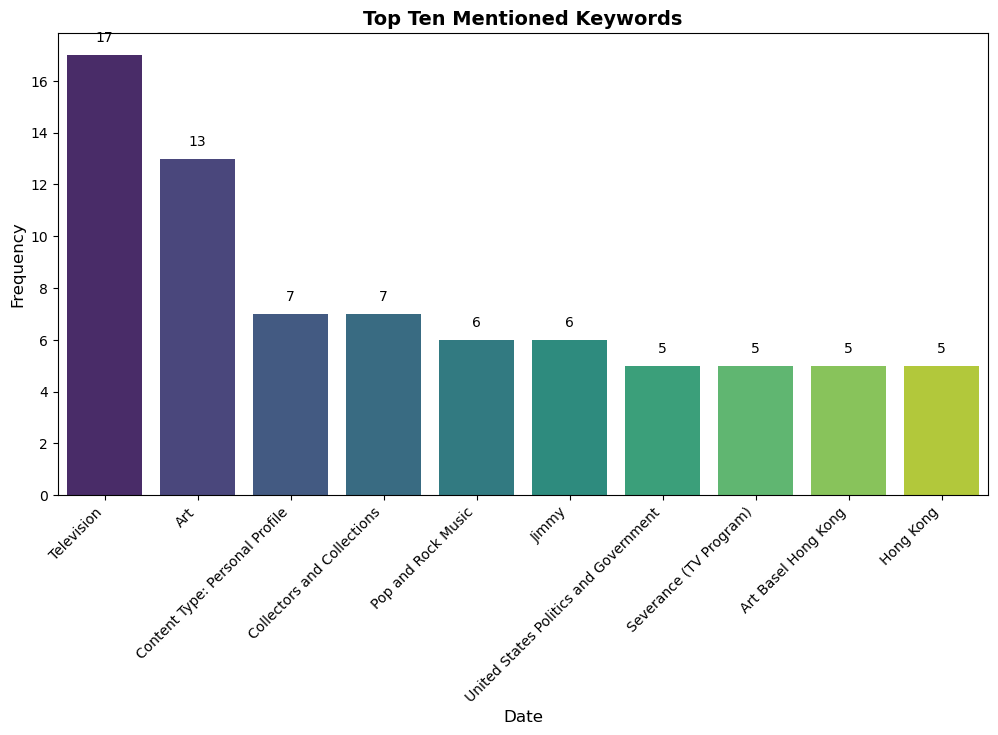

The line charts below analyzes the daily frequency of keywords in the section Arts over the selected time period of 01-01-2025 to 03-22-2025 to see if interest in certain topics is increasing or decreasing over the period. 


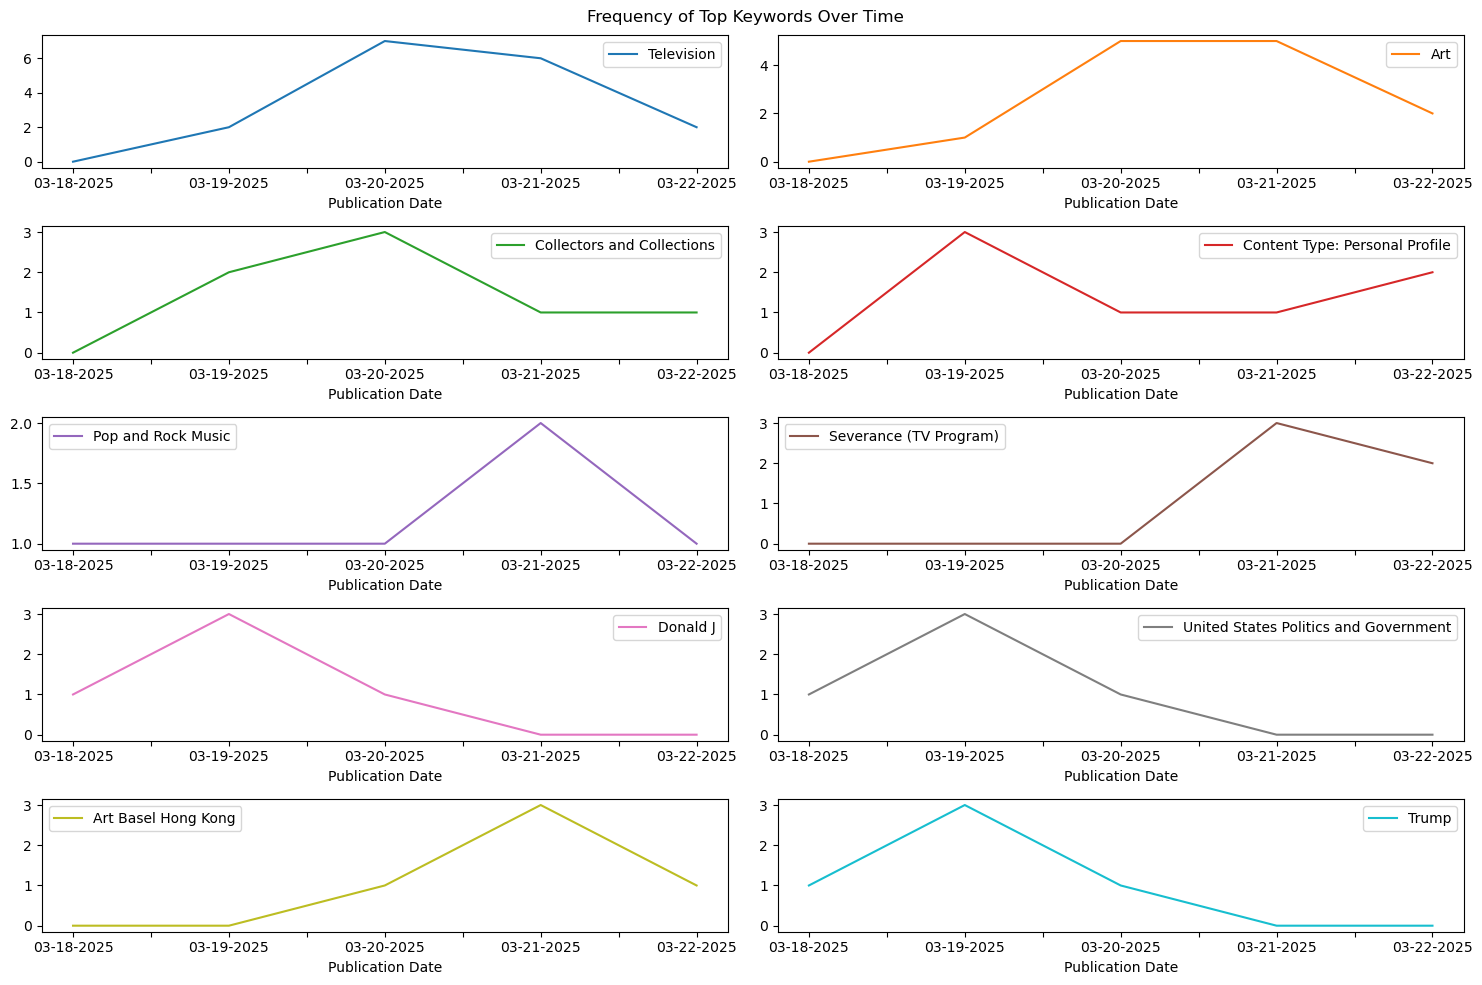

The line graph below shows t1he daily number of articles published in the section Arts over the selected time period of 01-01-2025 to 03-22-2025.


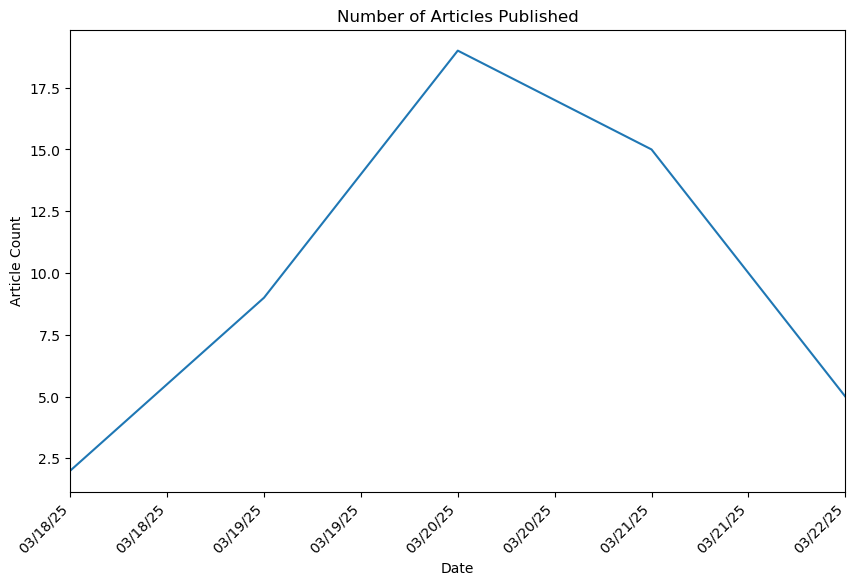

The line charts below analyzes the daily frequency of author publications in the section Arts over the selected time period of 01-01-2025 to 03-22-2025.


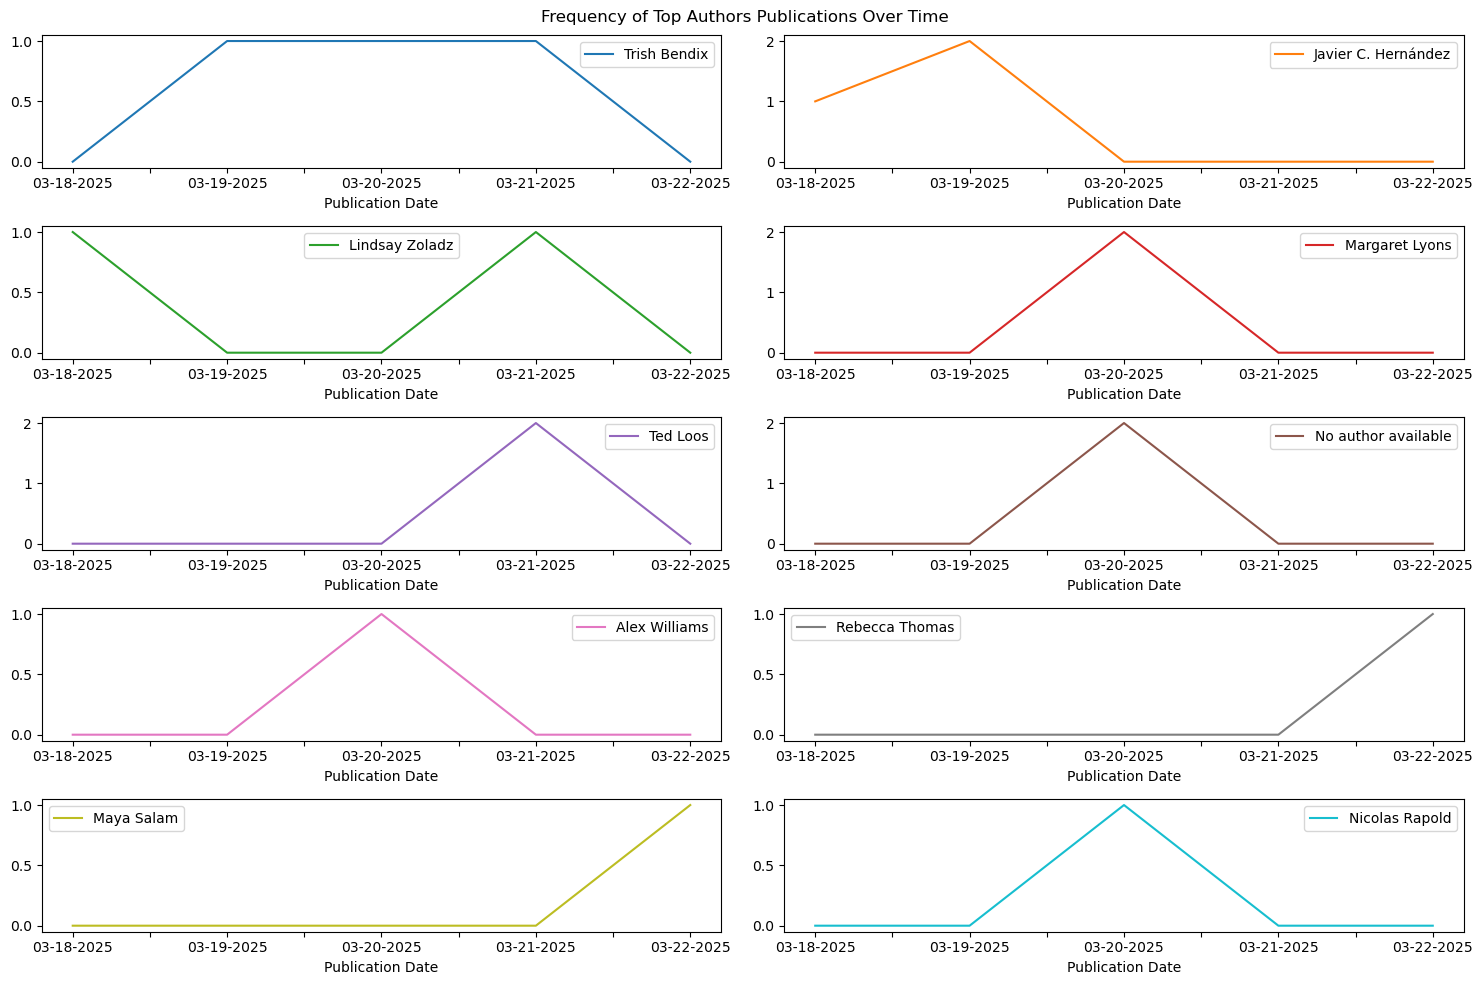

Total number of articles: 50


,Headline,Author,Keywords,Publication Date,Publication Datetime,Day
0,‘Severance’ Finale: Which Theories Were Correct?,Maya Salam,"Television, Severance (TV Program), Apple TV P...",03-22-2025,2025-03-22,2025-03-22
1,The ‘Severance’ Actress Who Has Milk and Cooki...,Rebecca Thomas,"Actors and Actresses, Content Type: Personal P...",03-22-2025,2025-03-22,2025-03-22
2,"In Taipei, a Mother and Daughter Reflect on th...",Amy Chang Chien,"Art, Art Basel Hong Kong, Collectors and Colle...",03-22-2025,2025-03-22,2025-03-22
3,‘This Is Our Pompeii’: Altadena Artists Pickin...,Jonathan Griffin,"Art, Southern California Wildfires (Jan 2025),...",03-22-2025,2025-03-22,2025-03-22
4,Mayhem Has the Wildest Story in Black Metal. S...,Elisabeth Vincentelli,"Pop and Rock Music, Content Type: Personal Pro...",03-22-2025,2025-03-22,2025-03-22


In [56]:
# executing main when ran

if __name__ == '__main__':


  # calling main function
  main()


